In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("monthly_milk_production.csv", index_col="Date", parse_dates=True)

In [3]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Production  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


In [5]:
df.tail()

,Production
Date,
1975-08-01,858
1975-09-01,817
1975-10-01,827
1975-11-01,797
1975-12-01,843


In [6]:
df.loc["1965"]

,Production
Date,
1965-01-01,658
1965-02-01,622
1965-03-01,709
1965-04-01,722
1965-05-01,782
1965-06-01,756
1965-07-01,702
1965-08-01,653
1965-09-01,615


In [7]:
df.loc["1965"].mean()

Production    673.083333
dtype: float64

In [8]:
avg_prod = []
for i in range(1962, 1976):
    avg_prod.append(df.loc[f"{i}"].mean()[0])

In [9]:
avg_prod

[615.75,
 630.0,
 658.75,
 673.0833333333334,
 708.75,
 732.9166666666666,
 748.8333333333334,
 763.9166666666666,
 782.0,
 834.0833333333334,
 854.1666666666666,
 842.5833333333334,
 858.4166666666666,
 862.6666666666666]

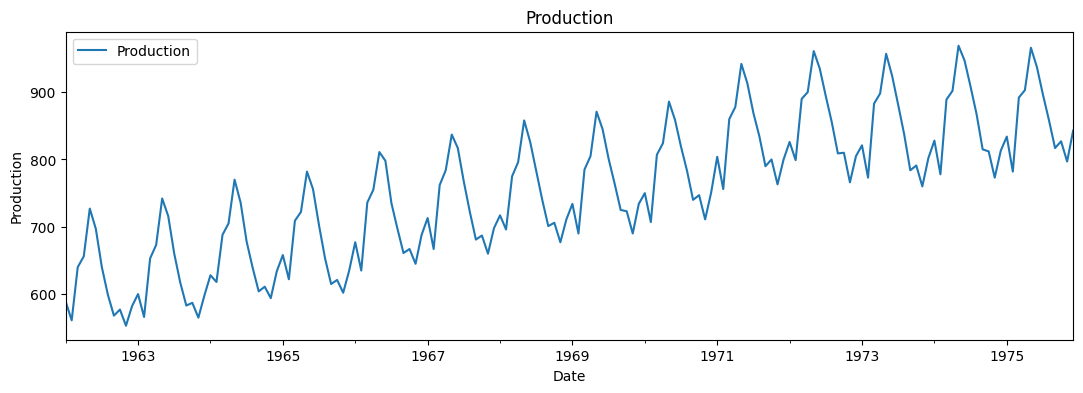

In [10]:
df.plot(figsize=(13, 4), title="Production", ylabel="Production")
plt.show()

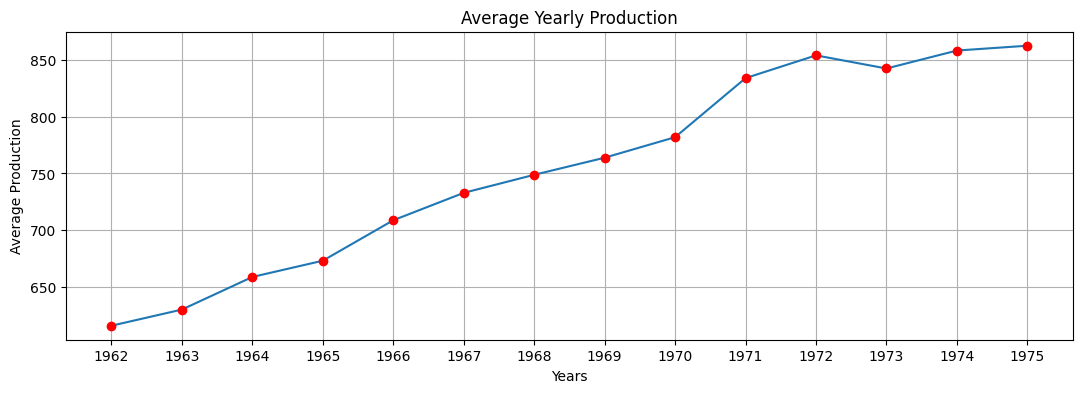

In [11]:
plt.figure(figsize=(13, 4))
plt.plot(range(1962, 1976), avg_prod)
plt.plot(range(1962, 1976), avg_prod, "ro")
plt.xticks(range(1962, 1976))
plt.title("Average Yearly Production")
plt.xlabel("Years")
plt.ylabel("Average Production")
plt.grid()
plt.show()

In [12]:
result = seasonal_decompose(df)

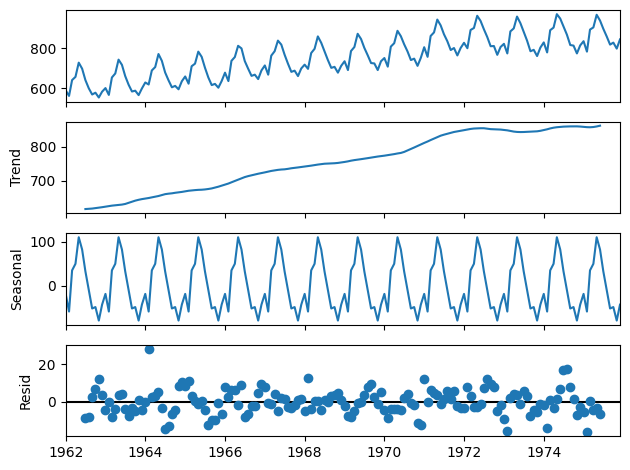

In [13]:
result.plot();

In [14]:
len(df)

168

In [20]:
train = df.iloc[:len(df)-12]
train

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1974-08-01,867
1974-09-01,815
1974-10-01,812


In [21]:
test = df.iloc[len(df)-12:]
test

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817


In [22]:
scaler = MinMaxScaler()

In [23]:
scaler.fit(train)

MinMaxScaler()

In [24]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [25]:
test

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817


In [26]:
scaled_test

array([[0.67548077],
       [0.55048077],
       [0.81490385],
       [0.84134615],
       [0.99278846],
       [0.92307692],
       [0.82451923],
       [0.73317308],
       [0.63461538],
       [0.65865385],
       [0.58653846],
       [0.69711538]])

In [27]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=12, batch_size=1)

In [28]:
generator

In [29]:
generator[0]

(array([[[0.08653846],
         [0.01923077],
         [0.20913462],
         [0.24759615],
         [0.41826923],
         [0.34615385],
         [0.20913462],
         [0.11057692],
         [0.03605769],
         [0.05769231],
         [0.        ],
         [0.06971154]]]),
 array([[0.11298077]]))

In [39]:
a, b = generator[1]

In [42]:
print(a.shape)
print(b.shape)

(1, 12, 1)
(1, 1)


In [46]:
model = Sequential([
    LSTM(2000, activation="relu",  input_shape=((12, 1))),
    Dense(1)
])

In [48]:
model.compile(optimizer="adam", loss="mse")

In [49]:
model.fit(generator, epochs=20)

Epoch 1/20

144/144 [==============================] - 53s 360ms/step - loss: 0.0737
Epoch 2/20
144/144 [==============================] - 51s 352ms/step - loss: 0.0174
Epoch 3/20
144/144 [==============================] - 50s 345ms/step - loss: 0.0066
Epoch 4/20
144/144 [==============================] - 50s 347ms/step - loss: 0.0037
Epoch 5/20
144/144 [==============================] - 50s 348ms/step - loss: 0.0046
Epoch 6/20
144/144 [==============================] - 50s 344ms/step - loss: 0.0048
Epoch 7/20
144/144 [==============================] - 51s 352ms/step - loss: 0.0037
Epoch 8/20
144/144 [==============================] - 50s 348ms/step - loss: 0.0022
Epoch 9/20
144/144 [==============================] - 51s 354ms/step - loss: 0.0034
Epoch 10/20
144/144 [==============================] - 51s 353ms/step - loss: 0.0031
Epoch 11/20
144/144 [==============================] - 51s 351ms/step - loss: 0.0038
Epoch 12/20
144/144 [==============================] - 51s 353ms/step - l

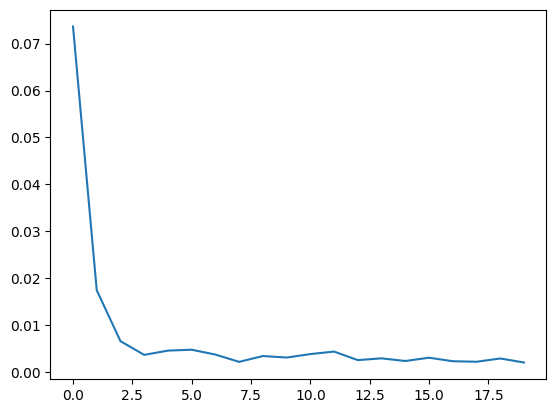

In [50]:
plt.plot(model.history.history["loss"])
plt.show()

In [51]:
last_train_batch = scaled_train[-12:]

In [52]:
last_train_batch = last_train_batch.reshape((1, 12, 1))

In [53]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 284ms/step


array([[0.7182106]], dtype=float32)

In [54]:
scaled_test[0]

array([0.67548077])

In [57]:
model.predict(last_train_batch)[0]

1/1 [==============================] - 0s 68ms/step


array([0.7182106], dtype=float32)

In [55]:
test_pred = []

In [56]:
first_eval_batch = scaled_train[-12:]
current_batch = first_eval_batch.reshape((1, 12, 1))

In [58]:
for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_pred.append(current_pred)

    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

1/1 [==============================] - 0s 70ms/step


In [59]:
test_pred

[array([0.7182106], dtype=float32),
 array([0.6265319], dtype=float32),
 array([0.8756279], dtype=float32),
 array([0.92992586], dtype=float32),
 array([1.0774453], dtype=float32),
 array([1.0430566], dtype=float32),
 array([0.952193], dtype=float32),
 array([0.8441146], dtype=float32),
 array([0.7146576], dtype=float32),
 array([0.6912408], dtype=float32),
 array([0.6051884], dtype=float32),
 array([0.6875421], dtype=float32)]

In [60]:
test

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817


In [61]:
true_pred = scaler.inverse_transform(test_pred)

In [62]:
true_pred

array([[ 851.77560043],
       [ 813.63726997],
       [ 917.26119614],
       [ 939.84915733],
       [1001.21723175],
       [ 986.91154861],
       [ 949.11229706],
       [ 904.15167427],
       [ 850.29756355],
       [ 840.5561676 ],
       [ 804.75838661],
       [ 839.01750565]])

In [63]:
test["Predicted_Prod"] = true_pred

In [64]:
test

,Production,Predicted_Prod
Date,,
1975-01-01,834,851.775600
1975-02-01,782,813.637270
1975-03-01,892,917.261196
1975-04-01,903,939.849157
1975-05-01,966,1001.217232
1975-06-01,937,986.911549
1975-07-01,896,949.112297
1975-08-01,858,904.151674
1975-09-01,817,850.297564


<Axes: xlabel='Date'>

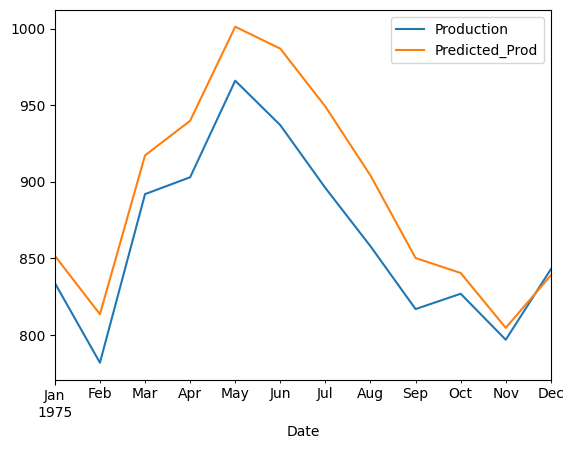

In [65]:
test.plot()

In [66]:
from sklearn.metrics import mean_squared_error

In [68]:
rmse = np.sqrt(mean_squared_error(test["Production"], test["Predicted_Prod"]))

In [69]:
rmse

33.371315933181215

In [70]:
test.mean()

Production        862.666667
Predicted_Prod    891.545467
dtype: float64

In [72]:
lower = test["Production"].mean() - rmse
upper = test["Production"].mean() + rmse

In [73]:
lower, upper

(829.2953507334854, 896.0379825998479)